In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_schedule(schedule_file):
    schedule = pd.read_csv(schedule_file, low_memory=False, encoding="ISO-8859-1")
    
    return schedule


In [3]:
def clean_schedule(schedule):
    
    # drop null values
    schedule.dropna(0, inplace=True)
    
    # extract StopID
    schedule["StopID"] = schedule['stop_id'].apply(lambda x: x[-4:])
    
    # Convert StopIDs back to int
    schedule['StopID'] = schedule['StopID'].astype('int64')
    
    # Extracting LineID from trip_id
    schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')
    
    # Extracting direction from trip_id
    schedule["Direction"] = schedule['trip_id'].apply(lambda x: x[-1:])
    
    # Dropping non-major journeypatterns
    schedule = schedule[(schedule.Direction == "I") | (schedule.Direction == "O")]
    
    # Converting Direction to JourneyPatternID
    schedule["JourneyPatternID"] = schedule['Direction'].apply(lambda x: "1001" if x == "I" else "0001")
    schedule['JourneyPatternID'] = schedule['JourneyPatternID'].astype('int64')
    
#     # dropping irrelevant columns
#     for column in ['trip_id', 'stop_id', 'arrival_time', 'departure_time', 
#                    'shape_dist_traveled', 'Direction', 'stop_sequence', 'stop_headsign']:
#             schedule = schedule.drop(column, 1)
            
    # Renaming 'Long' to 'Lon'
    schedule = schedule.rename(columns={'Long': 'Lon'})
    
    return schedule

In [4]:
def read_df(read_file):
    df = pd.read_csv(read_file, low_memory=False, header=None)
    df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
                  "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
                  "AtStop", "HumanTime", "Day", "Hour", "JourneyGroup", "Runtime"]
    
    return df

In [5]:
def clean_df(df):
    df = df[df.StopID != 'null']
    
    df['StopID'] = df['StopID'].astype('int64')

    return df
    

### Static Variables


In [6]:
line = "15"

### Extracting Data

In [7]:
schedule_file = 'bus_data/dublinbus_scheduledData2013csv.csv'
schedule = read_schedule(schedule_file)
schedule = clean_schedule(schedule)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [13]:
unique_stops = schedule[['Name without locality','Name','Lat','Lon','StopID']]
unique_stops = unique_stops.drop_duplicates()
unique_stops[unique_stops['Name without locality'].str.contains("set down")]

,Name without locality,Name,Lat,Lon,StopID
24772,For set down test 747 only,Opposite Convention Centre,53.347499,-6.239838,3854


In [24]:
readfile = "bus_data/clean_data5/" + line + ".csv"
    
df = read_df(readfile)

In [25]:
schedule.sample(50)

,trip_id,arrival_time,departure_time,stop_id,Name without locality,Name,Lat,Lon,stop_sequence,stop_headsign,shape_dist_traveled,StopID,LineID,Direction,JourneyPatternID
669273,5636.4159.0-83-b12-1.125.O,15:21:53,15:21:53,8220DB007424,Glasanaon Park,Glasanoan Road,53.388012,-6.292006,15,Kimmage,8319.670121,7424,83,O,1
14670,10183.333.0-13-b12-1.44.I,19:06:19,19:06:19,8220DB000087,Clare Road,Griffith Avenue,53.376752,-6.254865,65,Harristown,24122.443860,87,13,I,1001
893127,9369.1182.0-130-b12-1.377.O,21:08:52,21:08:52,8220DB001754,Dollymount Avenue,Clontarf Rd,53.364124,-6.176764,24,Castle Ave,6576.467815,1754,130,O,1
786895,7535.1594.0-33A-b12-1.448.O,14:56:47,14:56:47,8240DB003806,Hampton Cove,Balbriggan Rd,53.602977,-6.167669,60,Balbriggan,29443.457320,3806,33A,O,1
701426,6161.1345.0-150-b12-1.405.I,15:12:24,15:12:24,8220DB000308,Thomas Road,Oscar Square,53.336771,-6.279519,31,Fleet St,7935.384849,308,150,I,1001
372374,15978.4251.0-83A-b12-1.52.I,10:18:00,10:18:00,8220DB000319,O'Connell Bridge,Westmoreland Street,53.345969,-6.259277,30,Charlestown,7213.575600,319,83A,I,1001
534478,360.1579.0-27B-b12-1.442.I,14:36:00,14:36:00,8240DB001635,Sports Ground,Swords Road,53.411696,-6.238858,5,Marlborough St,2990.187498,1635,27B,I,1001
72364,11100.64.0-4-b12-1.6.O,23:20:00,23:20:00,8250DB000426,Nature Reserve,Rock Road,53.310967,-6.199831,49,Monkstown Av,15882.337400,426,4,O,1
742940,6832.1240.0-140-b12-1.379.O,07:28:00,07:28:00,8220DB000189,Broadstone,Phibsboro Road,53.357167,-6.273469,22,Rathmines,8936.879529,189,140,O,1
798068,7705.1547.0-27B-b12-1.437.O,12:09:00,12:09:00,8220DB001226,Kilmore Avenue,Kilmore Rd,53.388105,-6.214829,22,Harristown,6310.162211,1226,27B,O,1


### Examining Start & End stops of each route

In [26]:
# lines = schedule.LineID.unique()
lines = ["46A"]
patterns = [1001, 1]

In [39]:
for line in lines:
    print("Line", line)
    for pattern in patterns:
                
        sched_line = schedule[(schedule.LineID == line) & 
                      (schedule.JourneyPatternID == pattern)]
        
#         plotdf = sched_line[(schedule.LineID == "46A") & (schedule.JourneyPatternID == 1)][["Lon", "Lat"]]
#         plotdf.plot.scatter(x="Lon", y="Lat")
        
        headsigns = sched_line.stop_headsign.unique()

        first = sched_line.groupby(["LineID", "JourneyPatternID", "stop_headsign"]).head(1)
        last = sched_line.groupby(["LineID", "JourneyPatternID", "stop_headsign"]).tail(1)
        
        print(first.shape)
        
        print(pattern)
        print("No. of headsigns", len(headsigns))
        print("No. of first stops:", len(first.StopID.unique()))
        print("First stops:", first.StopID.unique())
        print("No. of last stops:", len(last.StopID.unique()))
    
    print()

        

Line 46A
(5, 15)
1001
No. of headsigns 5
No. of first stops: 3
First stops: [2039 2064 2060]
No. of last stops: 4
(3, 15)
1
No. of headsigns 3
No. of first stops: 1
First stops: [807]
No. of last stops: 3



In [29]:
pattern = 1001
sched_line = schedule[(schedule.LineID == line) & 
                      (schedule.JourneyPatternID == pattern)]

first = sched_line.groupby(["LineID", "JourneyPatternID"]).head(1)
last = sched_line.groupby(["LineID", "JourneyPatternID"]).tail(1)

In [30]:
print(len(first.StopID.unique()))


1


In [31]:
last.StopID.unique()

array([4962])

In [32]:
# Examining how many stops there are in either direction in schedule

schedule_line = schedule[schedule.LineID == line]
directions = schedule_line.JourneyPatternID.unique()

df_stops = {}

for direction in directions:
    direction_count = schedule_line[schedule_line.JourneyPatternID == direction].StopID.nunique()
    print(direction, direction_count)

1 61
1001 64


### Exploring line 15

In [33]:
# Examining how many stops there are in either direction in df

variants = df.JourneyPatternID.unique()

for variant in variants:
    stop_count = df[df.JourneyPatternID == variant].StopID.nunique()
    print(variant, stop_count)

1 93
1001 82


### Comparing Schedule to our data


In [34]:
schedule_in = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1001)]
schedule_out = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1)]
df_1001 = df[df.JourneyPatternID == 1001]
df_0001 = df[df.JourneyPatternID == 1]


stops_in = set(schedule_in.StopID.unique())
stops_out = set(schedule_out.StopID.unique())

stops_1001 = set(df_1001.StopID.unique())
stops_0001 = set(df_0001.StopID.unique())

# print(len(set1.difference(set2)))


In [35]:
# symmetric difference between both sets of stops

print(stops_in ^ stops_1001)
print(stops_out ^ stops_0001)


{2, 515, 516, 519, 2056, 521, 522, 523, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2068, 2069, 2070, 2041, 2084, 6318, 1069, 1070, 1071, 1072, 1074, 7236, 7245, 7246, 4727, 4728, 1150, 1151, 1152, 1153, 1154, 1155, 1157, 1158, 1159, 1160, 1161, 6282, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 669, 670, 671, 672, 6315, 1196, 6316, 6317, 1197, 1198, 1201, 1199, 1200, 1202, 1203, 6326, 6320, 6319, 6335, 192, 1272, 1273, 1277, 768, 769, 770, 771, 772, 773, 4870, 774, 775, 777, 776, 786, 274, 4886, 4887, 795, 796, 797, 4382, 798, 4384, 4385, 799, 800, 801, 802, 803, 804, 805, 806, 807, 299, 320, 7516, 348, 4962, 906, 907, 908, 909, 4528, 946, 6074, 6079, 461, 4563, 4568, 4569, 4570, 6115, 497, 4593, 4594, 4596, 4595, 2039, 2040, 1017, 2042, 2043, 2044, 2045, 2046}
{2039, 4636, 1069, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 5190, 7245, 7246, 81, 1121, 1122, 1123, 1124, 1125, 614, 615, 616, 617, 618, 619, 1127, 1130, 4719, 1140, 1141, 1142, 1143, 1144, 1145,

In [36]:
schedule_out.stop_headsign.unique()

array(['Dun Laoghaire', "D'Olier St", 'UCD'], dtype=object)

### Drop all stops that aren't in both dataframes

In [103]:
instops = list(stops_in & stops_1001)
outstops = list(stops_out & stops_0001)

allstops = instops + outstops

In [104]:
print(len(instops))
print(len(outstops))
print(len(allstops))

67
72
139


In [105]:
# have to do this part on a line by line basis. 

# df = df[df.StopID.isin(allstops)]
# schedule = schedule[schedule.StopID.isin(allstops)]

### Saving CSV with true stop locations

In [106]:
# Renaming Long to Lon, so it cooperates with our other data
schedule = schedule.rename(columns={'Long': 'Lon'})

In [107]:
stop_locations = schedule[['StopID', 'Lat', 'Lon']]
stop_locations.shape

(921993, 3)

In [108]:
stop_locations = stop_locations.drop_duplicates()
stop_locations.shape

(4719, 3)

In [109]:
stop_locations.to_csv("bus_data/stop_locations.csv", index=False)

### ---Rough Work---

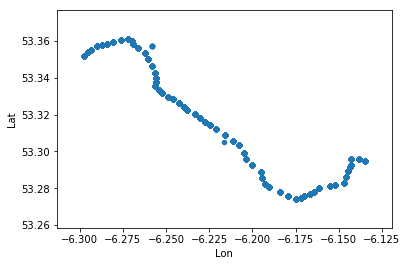

In [110]:
plotdf = schedule[(schedule.LineID == "46A") & (schedule.JourneyPatternID == 1)][["Lon", "Lat"]]
plotdf.plot.scatter(x="Lon", y="Lat")

In [111]:
out = df[df.JourneyPatternID == 1]

out = out.groupby(['StopID'])['Runtime'].mean().reset_index()

# out
out.sort_values(['Runtime'])


,StopID,Runtime
68,6318,0.000000
69,6319,172.100429
71,7246,201.263812
70,6320,279.354961
59,4594,364.686243
60,4595,454.959007
61,4596,495.623851
58,4563,567.040926
45,1218,643.087120
49,1270,709.097706


### Comparing our own order to schedule 

In [160]:
df = pd.read_csv("bus_data/static_data2/route_stops_all.csv", low_memory=False)
df.head()

,Unnamed: 0,StopID,Runtime,Order,LineID,JourneyPatternID
0,0,228,0.000000,0,1,1001
1,1,381,0.361111,1,1,1001
2,2,265,262.200000,2,1,1001
3,3,382,314.279412,3,1,1001
4,4,4451,333.093023,4,1,1001


In [161]:
line_15 = df[(df.LineID == '15') & (df.JourneyPatternID == 1)]
schedule_15 = schedule[(schedule.LineID == '15') & (schedule.JourneyPatternID == 1)]

In [162]:
line_15 = line_15[['StopID', 'Order']]
schedule_15 = schedule_15[['StopID', 'stop_sequence']]


In [163]:
# finding common stops
stops_df = set(line_15.StopID.unique())
stops_schedule = set(schedule_15.StopID.unique())

common_stops = list(stops_df & stops_schedule)

print(stops_df ^ stops_schedule)


{7245, 1152, 1154, 1155, 1164, 1166, 6320, 6326, 6335, 4886, 4887, 299, 497}


In [164]:
line_15 = line_15[line_15.StopID.isin(common_stops)]
schedule_15 = schedule_15[schedule_15.StopID.isin(common_stops)]

In [165]:
line_15

,StopID,Order
1555,664,8
1556,6318,9
1557,6319,10
1558,7246,11
1559,4594,12
1560,4595,13
1561,4596,14
1563,4563,16
1566,1218,19
1567,1270,20


In [166]:
schedule_15

,StopID,stop_sequence
89016,6318,1
89017,6319,2
89018,7246,3
89020,4594,5
89021,4595,6
89022,4596,7
89023,4563,8
89024,1218,9
89025,1270,10
89026,1272,11


In [41]:
schedule_46A = schedule[(schedule.LineID == '46A') & (schedule.JourneyPatternID == 1)]
schedule_46A = schedule_46A[['StopID', 'stop_sequence']]


In [42]:
schedule_46A

,StopID,stop_sequence
170829,807,1
170830,808,2
170831,809,3
170832,810,4
170833,811,5
170834,812,6
170835,813,7
170836,814,8
170837,81,9
170838,817,10
